# Tutorial Basics sheet music Part 2: Statistics

(version 2022_02_06)

### Table of contents:

 [1. Query for simple statistical data](#1)


 [2. Frequencies](#2)       
   * 2.1 [Pitches](#21)
   * 2.2 [Pitch classes](#22)
   * 2.3 [Intervals](#23)
   * 2.4 [Note durations](#24)
   * 2.5 [Metrical profile](#25)


 [3. Two-dimensional frequency distributions](#3) 
   * 3.1 [Duration values of pitch classes](#31)
   * 3.2 [Metrical positions of pitch classes](#32)

[4. Application of bar and voice filters](#4)
  
[5. Tasks](#5) 

This tutorial introduces the computer-assisted possibilities of simple statistical queries based on CAMAT (Computer-Assisted Music Analysis Tool) with music examples.

Working through the tutorial should enable you to examine your own sheet music files using computer-assisted methods.

Each session with a Jupyter Notebook begins with the import of a set of Python libraries required for the analysis:

In [2]:
import sys
import os
sys.path.append(os.getcwd().replace(os.path.join('music_xml_parser', 'ipynb'), ''))
import music_xml_parser as mp
from music21 import * 
import csv
from IPython.display import HTML, display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# With these commands the CAMAT music_xml_parser 
# as well as the libraries 'numpy' and 'pandas' for static evaluations,  
# 'music21' and 'matplotlib' for graphical representations are activated.  

# The following command enables the download of xml files from the Internet.
 
environment.set('autoDownload', 'allow')

# The following commands are used to set the formatting for the tables,  
# which are shown below - '9999' is the maximum value:
 
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 9999)
pd.set_option('display.width', 9999)

Then, you have to load the sheet music file you want to examine (from the internet or from your hard disk) and activate the xml-parser. This will create a new dataframe ('m_df') from the xml file, which will be the basis for the following statistical queries (cf. https://analyse.hfm-weimar.de/jupyter/CAMAT_Basics_Part1_Einfuehrung.html).

As music example for our tutorial we choose the first movement from the String Quartet K. 171 by Wolfgang Amadeus Mozart (see Basics Part 1).

In [3]:
xml_file = 'https://analyse.hfm-weimar.de/database/03/MoWo_K171_COM_1-4_StringQuar_003_00867.xml'

m_df = mp.parse.with_xml_file(file=xml_file,
                                    save_file_name=None, 
                                    do_save=False)

# You can also assign another variable name instead of 'm_df'.  
# This is useful if you want to work with multiple sheet music files in parallel.

# For the setting of the two parameters, please also refer to the introductory tutorial (Part1).

File at:  ../music_xml_parser/data/xmls_to_parse/hfm_database/MoWo_K171_COM_1-4_StringQuar_003_00867.xml


In [1]:
# If you want to view the dataframe table in sections in the browser (and not in the external csv file),
# you have to activate the command 'm_df' by deleting the hash key.  

# m_df

# For a complete view use the following command:  

# mp.utils.print_full_df(m_df)

# IMPORTANT: This can be very computationally intensive!!

### 1. Query simple statistical data<a id='1'></a>

We start with simple statistical queries of the number of voices, the length in measures, the number of notes (total and per voice), and the ambitus of each voice.

Please open the sheet music file in parallel in your score editor (e.g. MuseScore).

Note: With the first evaluation command the data is read in for the first time. Therefore, the execution could take a relatively long time (up to several minutes – depending on your computer and the file size). However, all following commands will go very quickly!!!

In [4]:
v = m_df[['PartID','PartName']].drop_duplicates().to_numpy()
mp.utils.display_table(data=v, 
                       columns=['Part ID', 'Part Name'])

# In the first command line, from the dataframe list of the xml parser ('m_df')
# the PartIDs and PartNames are read, 
# i.e. the IDs and designations of the individual voices.  
# The variable 'v' is assigned for this purpose.
# The second line defines the column headings of the table.  

# IMPORTANT: If no voice name is specified in a MusicXML file,  
# the PartName can, of course, not be displayed here ('None')!

Query of the piece length in measures:

In [5]:
m = m_df['Measure'].to_numpy(dtype=int)
max(m)

159

Query of the number of tones per voice, with tied tones each counted as one tone:

In [7]:
n_notes, c_notes = np.unique(m_df['PartName'], return_counts=True)
data = [[i, c] for i, c in zip(n_notes, c_notes) ]
mp.utils.display_table(data=data, 
                       columns=['Part Name', 'Number of Notes'])
 
# If the voices in the xml file have no designations,  
# so 'PartName' (and 'Part Name') must be replaced by 'PartID'!  

The ambitus per voice is given in semitone steps, i.e. the difference between the lowest (min) and highest (max) note; given in MIDI values with c' = C4 = 60; c'' = C5 = 72 and so on:

In [8]:
ambitus = mp.analyse.ambitus(m_df,
                             output_as_midi=True)

# By the parameter 'output_as_midi=False' the notes are specified with names.

# The following command sets the output table:    

mp.utils.display_table(data=ambitus, 
                       columns=['Part ID', 'PartName', 'min', 'max', 'Ambitus'])

# In the last command line the table columns are named.  
# You can rename them as you wish. 

In [8]:
# The addition 'output_as_midi=False' specifies the tones with tone names.

ambitus = mp.analyse.ambitus(m_df,
                             output_as_midi=False)

mp.utils.display_table(data=ambitus, 
                       columns=['Part ID', 'PartName', 'min', 'max', 'Ambitus'])


### 2. Frequencies<a id='2'></a>

To characterize individual compositions and to compare different pieces of music, it can be useful to determine the frequency of certain elements (pitches, note durations, etc.). For such issues frequency tables and graphical representations, so-called histograms, can be created.

### 2.1 Pitch<a id='21'></a>

Which pitches appear how often? How diatonic is the tonal resource of a composition, how many additional chromatic notes appear?

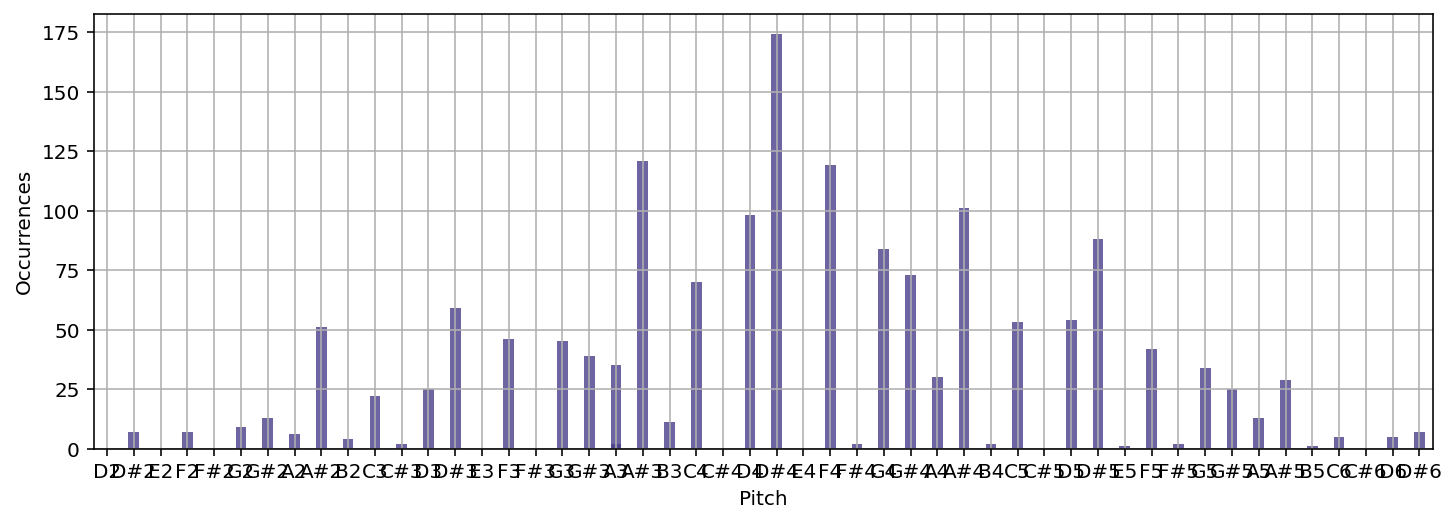

In [14]:
pitch_hist = mp.analyse.pitch_histogram(m_df, 
                                        do_plot=True, 
                                        visulize_midi_range=None)

# With the first line a histogram representation with the name 'pitch_hist' is generated from 'm_df'.  
# By the parameter 'do_plot=True' the graphic is displayed.  
# By 'visulize_midi_range=None' a table display (see below) is prevented.

What can we recognize?

Mozart apparently uses mainly notes of the E-flat major scale in the composition (E-flat=D#, A-flat=G#, B-flat=a#, etc.) and hardly any chromatic notes.

Tip: The graphic can also be displayed in an external pop-up window of the program Matplotlib and further processed, enlarged, reformatted and saved etc. there. To do this, the code must be preceded by the command '%matplotlib'. Afterwards Matplotlib must be switched off again by the command '%matplotlib inline'. Otherwise all following graphics are also displayed externally.

We now want to know exactly how often the individual pitches appear!

In [17]:
# The frequency table is generated when we rearrange the parameters: 
# 'do_plot=None' 
 

pitch_hist = mp.analyse.pitch_histogram(m_df, 
                                        do_plot=None,
                                        do_plot_full_axis=True,
                                        visulize_midi_range=None,
                                        filter_dict=None,
                                        enharmonic=True)

mp.utils.display_table(data=pitch_hist, 
                       columns=['MIDI', 'Pitch', 'Octave', 'Occurences'])

# The second command displays and labels the table.  

The table also shows the respective accidentals in the score. This can be useful when modulations into distant keys occur, for example. Here -1 stands for a b-sign, 1 for a #-sign, 0 for a resolution sign, -2 for a double bb and so on. This means:

* E-1 = Eb
* A-1 = Ab
* A0 = A (with resolution character)
* B-1 = Bb
* B0 = B (with resolution character) 
etc.

Please pay attention to A3: Midi pitch 57 appears in two lines, since the A occurs 35 times with natural sign in the score, but twice without natural sign (presumably later in the measure of an already resolved measure).

If these specifications are too differentiated for me, I can switch them off with the additional parameter 'enharmonic=False'. Now E-flat becomes D-sharp (D#), A-flat becomes G-sharp (G#) and so on. Additionally I have to rename the column names of the table now, because now pitch and octave position are merged into one column:


In [18]:
pitch_hist = mp.analyse.pitch_histogram(m_df, 
                                        do_plot=None,
                                        do_plot_full_axis=True,
                                        visulize_midi_range=None,
                                        filter_dict=None,
                                        enharmonic=False)

mp.utils.display_table(data=pitch_hist, 
                       columns=['MIDI', 'Pitch', 'Occurences'])

# The second command redraws and labels the table columns.  

Now A3 appears in only one column, with frequency 37.

The following command exports the list of pitch frequencies as a csv file (csv = comma separated variables; readable and processable in Excel or the text editor, among others). The export can be used to generate tables for comparisons and corpus analysis. The csv file is saved in the export folder and can be opened with a text editor or a spreadsheet program (e.g. Excel).

In [19]:
mp.utils.export_as_csv(data=pitch_hist, 
                       columns=['MIDI','Pitch','Occurrences'],
                       save_file_name ='pitch_histogram.csv',  # auch andere Dateinamen sind möglich
                       do_save=True,    # Command for saving
                       do_print=False,  # at 'True' the file is displayed again in the browser
                       sep=';',         # a semicolon is used as separator    
                       header=True)     # the headers of the columns are displayed 

# The pitch_histogram.csv file is automatically saved in the music_xml_parser\data\exports\ folder. 
# If you want to save it in another folder, 
# you have to enter a path under save_file_name (e.g. 'C:/pitch_histogram.csv')

There are two ways to make the graphical representation a little clearer: On the one hand, the representation can be restricted to a certain pitch range. On the other hand, only those pitches can be selected that actually occur. 

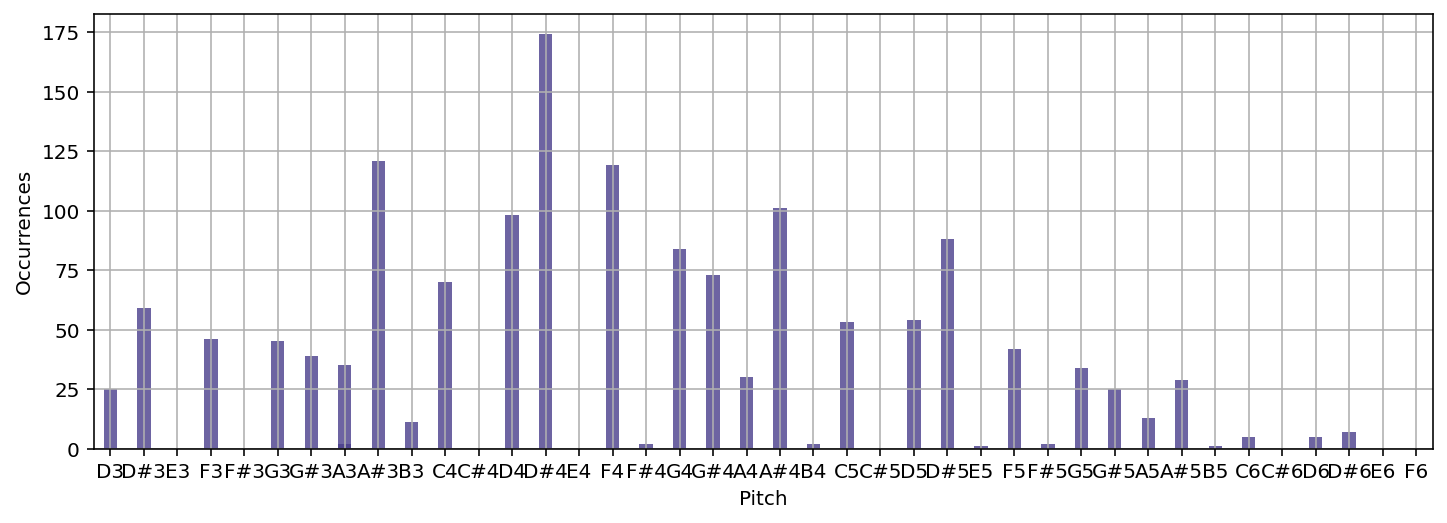

In [20]:
ph = mp.analyse.pitch_histogram(m_df, 
                                do_plot=True, 
                                visulize_midi_range=[50, 90])

# The addition 'visulize_midi_range=[50, 90]' limits the displayed section
# to the range between MIDI pitch 50 (= D3) and 90 (= F6).


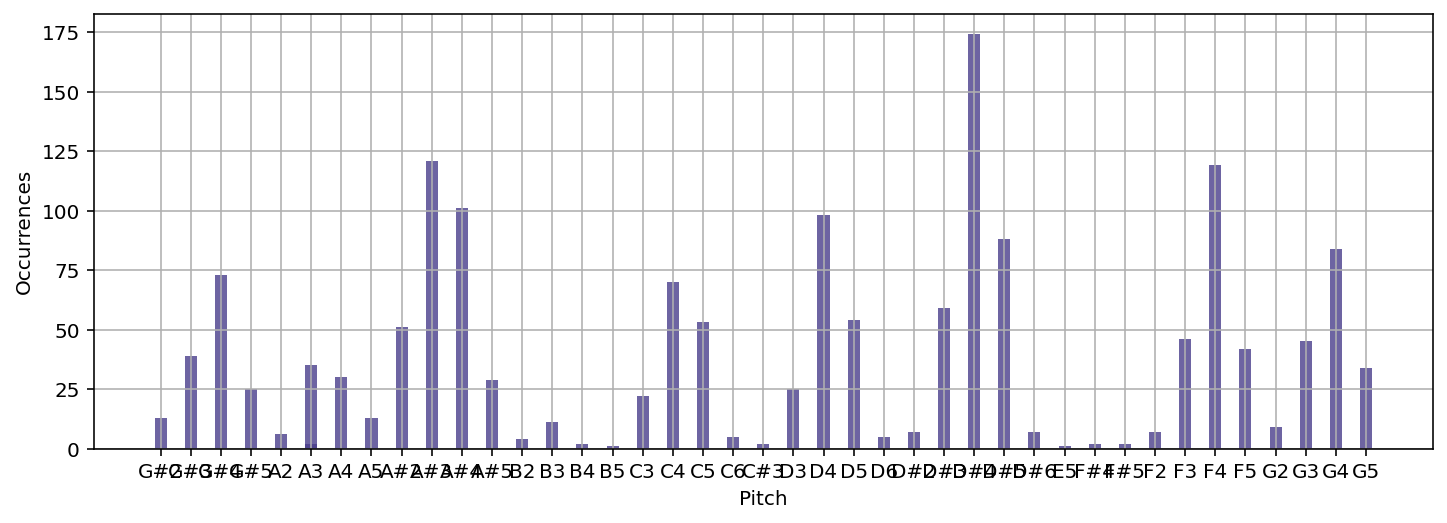

In [21]:
ph2 = mp.analyse.pitch_histogram(m_df,
                                 do_plot=True,
                                 visulize_midi_range=None,
                                 do_plot_full_axis=False)

# With the addition 'do_plot_full_axis=False,' only the frequencies 
# of tones that actually occur are displayed in the graph.  
# All other tones are deleted on the x-axis.  

### 2.2 Pitch classes <a id='22'></a>

For harmonic analyses, it is much clearer not to group the individual pitches, but to group them into pitch classes.

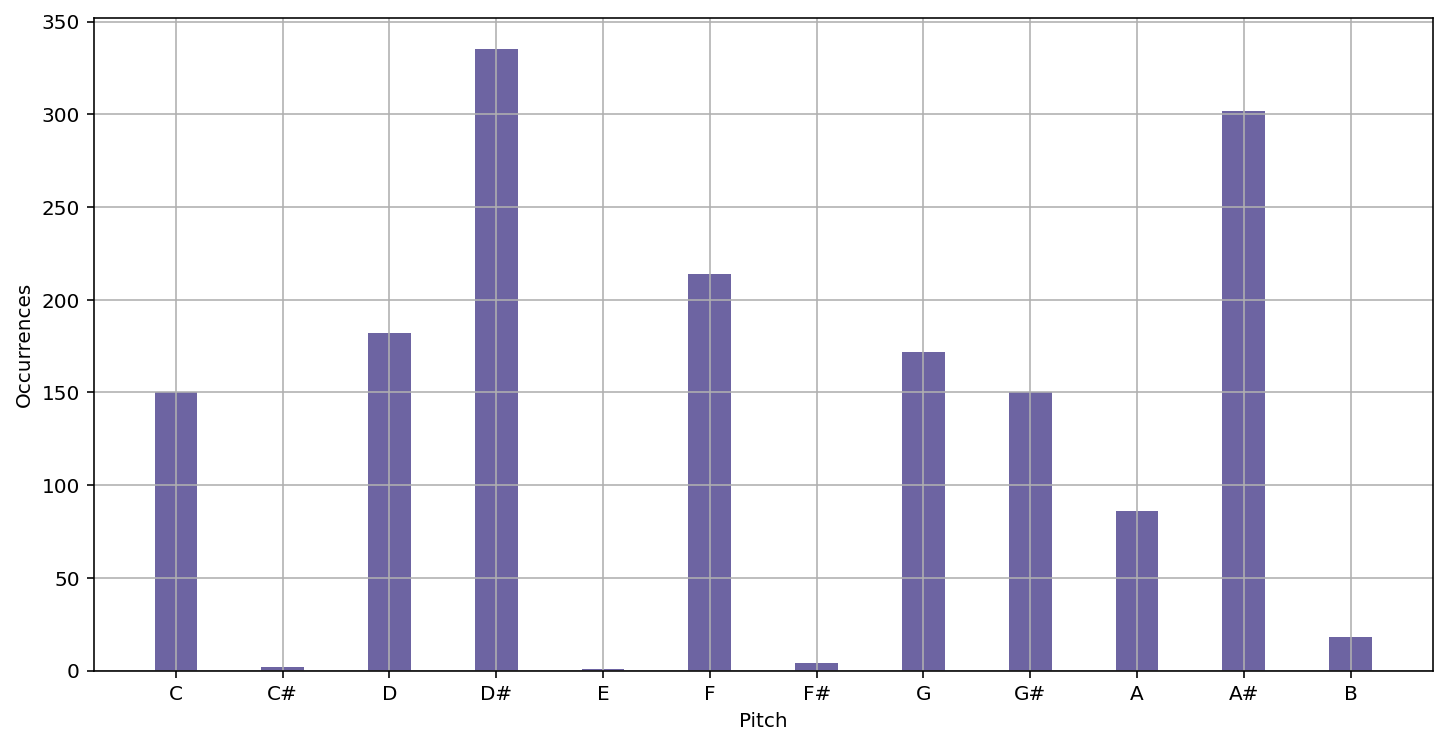

In [22]:
pitchclass_hist = mp.analyse.pitch_class_histogram(m_df, 
                                                   do_plot=True)

Now it can be seen at a glance: Mozart uses almost exclusively the notes of the E-flat major scale - with one interesting exception: the tritone a appears relatively often!

What could this be related to? To answer this question, of course, you need to look at the score and check the uses of the note a there. Could it have to do with the use of double dominants (F major)?


As for pitches (see section 2.1), tables can also be displayed for pitch classes. The frequency table is created automatically as soon as the plot parameter ('do_plot=None') is issued in the command:

In [16]:
pitchclass_hist = mp.analyse.pitch_class_histogram(m_df, 
                                                   do_plot=None)

mp.utils.display_table(data=pitchclass_hist, 
                       columns=['Pitch Class','Occurences'])

# The second command displays and labels the table.
# You can name the label individually ('red expressions')

In [17]:
# The frequencies of the pitch classes are exported as a csv file with the following command:   

mp.utils.export_as_csv(data=pitchclass_hist, 
                       columns=['Pitch Class','Occurrences'],
                       save_file_name ='pitch_class_hist.csv', 
                       do_save=False,
                       do_print=None, 
                       sep=';', 
                       header=True)

# (For the parameters see above, 2.1)

### 2.3 Intervals in monophonic note sequence<a id='23'></a>

How often does a certain interval step occur in the individual voices? Do all voices have a similar interval progression - or are there more leaps in the lower voices, for example, and more steps in the melody voice?

First, let's look at the interval distribution in the first violin

In [23]:
v = m_df[['PartID','PartName']].drop_duplicates().to_numpy()
print(v)

# This command first displays the voices and their names.   

[['1' 'Violino I']
 ['2' 'Violino II']
 ['3' 'Viola']
 ['4' 'Violoncello']]


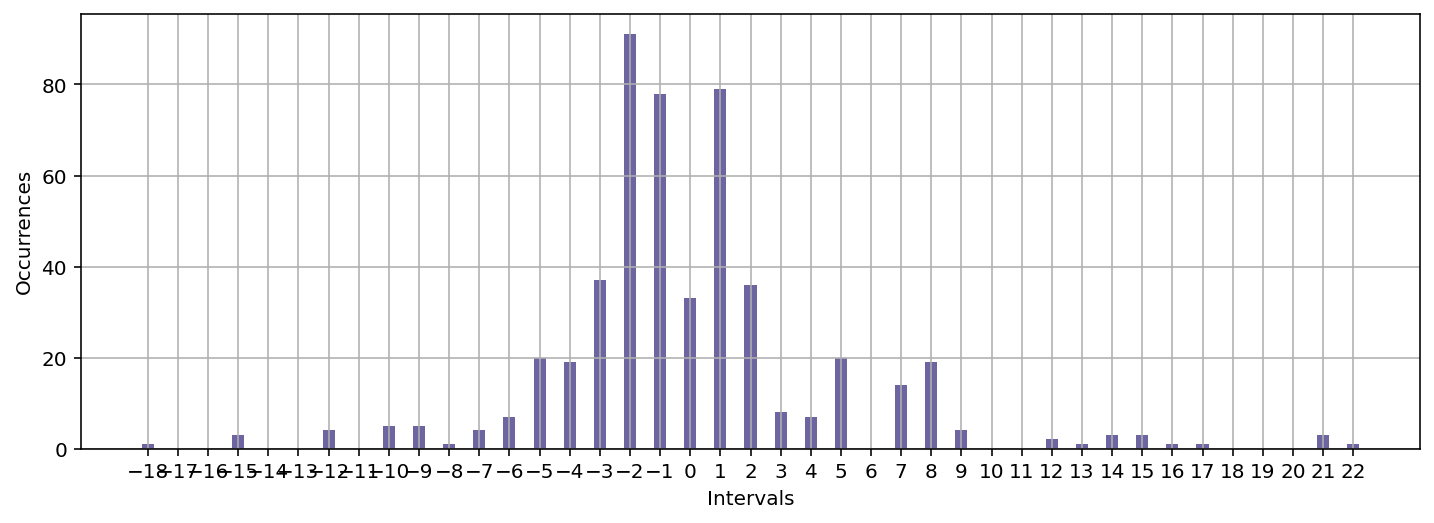

In [24]:
# Now we select the first voice (with the PartID=1): 'part='1'.  

interval_hist = mp.analyse.interval(m_df,
                                    part='1',
                                    do_plot=True)

The first violin progresses primarily in seconds, thirds, and fourths, with descending steps being more common than ascending ones. Larger intervals also occur, but are much rarer.

In [20]:
# The following command displays the distribution of interval frequencies 
# as a table (only if 'do_print=True')
# and exports the table to the file 'interval_1.csv' (only if 'do_save=True').


mp.utils.export_as_csv(data=interval_hist, 
                       columns=['Interval', 'Occurences'],
                       save_file_name ='interval_1.csv', 
                       do_save=True,
                       do_print=False, 
                       do_return_pd=False,
                       sep=';', 
                       index=False, 
                       header=True)

Now, what about the cello part?

For this you simply have to replace the '1' with a '4' at the right place...

Simply copy the entire command into a new code cell and adjust the voice selection:


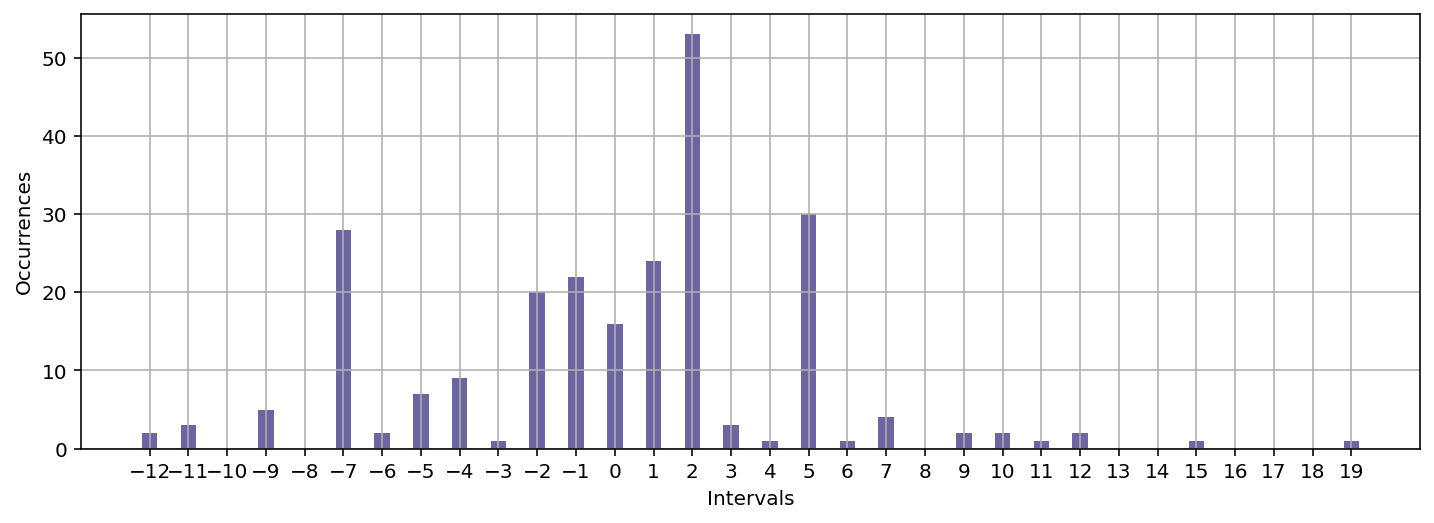

In [21]:
# Here is the customized command:  

interval_hist = mp.analyse.interval(m_df,
                                    part='4',
                                    do_plot=True)

Noticeably, fourths up (5), seconds up (2) as well as fifths down (-7) occur quite frequently. Perhaps this is a hint to the fundamental tones that can be interpreted harmonically? 

### 2.4 Tone durations<a id='24'></a> 

Now let's turn to rhythmic shaping: what duration values are used in the composition, and how often do they occur in each case?

In the following evaluation, the quarter note is given the value 1. Shorter and longer note values are named accordingly as multiples or divisors of 1.


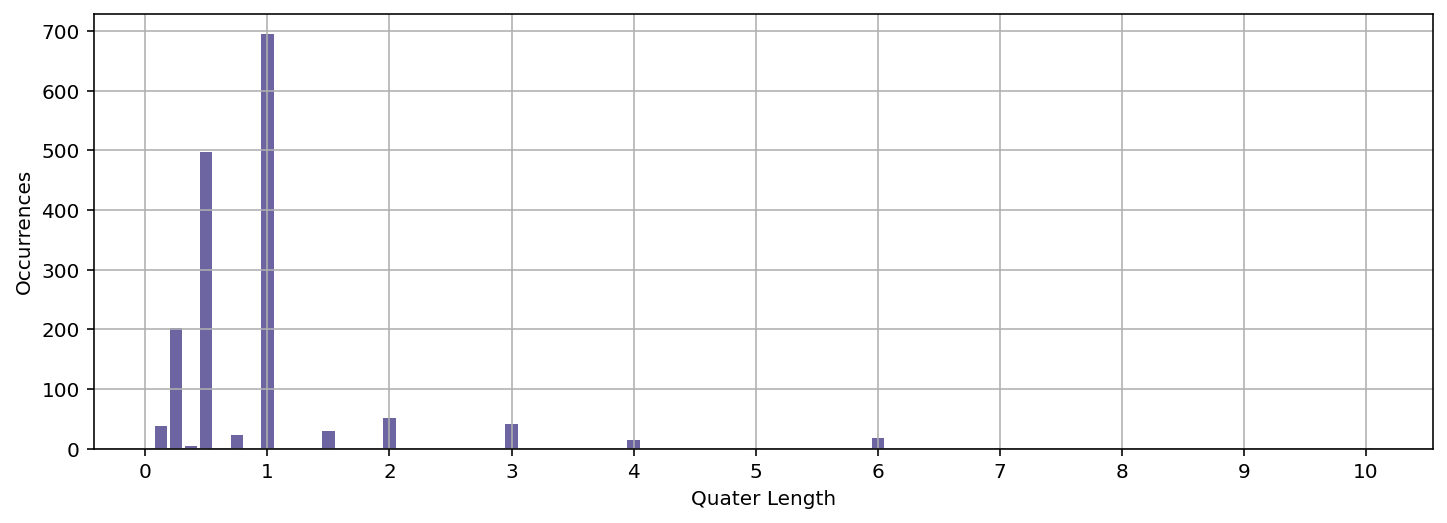

In [25]:
quarter_dur_hist = mp.analyse.quarterlength_duration_histogram(m_df,
                                                               do_plot=True)

As expected, Mozart uses mainly quarter notes (1) and smaller note values (<1). However, there are also a few longer notes. If we want to know the exact number of duration values and are also interested in the <1 range, we have to display the frequency table again:

In [26]:
quarter_dur_hist = mp.analyse.quarterlength_duration_histogram(m_df,
                                                               do_plot=False)
# The table is created only  with  'do_plot=False' or 'do_plot=None'  
# The table is created and labeled by the following command:

mp.utils.display_table(data=quarter_dur_hist, 
                       columns=['Duration Class','Occurences'])

To explain the duration values: They are multiples or divisors of a quarter note (=1). Thus: 

* 1 = quarter note
* 0.75 = dotted quaver
* 0.5 = quaver
* 0.375 = dotted 16th
* 0.25 = 16th
* 0.125 = 32nd


In [24]:
# Here is the command to save the table:  

mp.utils.export_as_csv(data=quarter_dur_hist, 
                       columns=['Duration Values', 'Occurrences'],
                       save_file_name ='quarter_duration_hist.csv', 
                       do_save=True,         
                       do_print=False, 
                       sep=';', 
                       index=False, 
                       header=True)

### 2.5 Metrical profile <a id='25'></a>

How clearly is the meter articulated in the voices of a composition - by the placement of tones on measure beginnings or on metrically important positions within the measure (e.g. the middle of the measure or on the quarter positions)? For this purpose, a list of the frequencies of tones on the various metrical positions can be displayed.

Of course, such a profile presupposes that the examined piece is in a single meter and has no meter changes. This can be checked with the following command:

In [27]:
ts_hist = mp.analyse.time_signature_histogram(m_df,
                                              do_plot=False)

mp.utils.display_table(data=ts_hist, 
                       columns=['Meter', 'Ocurrences'])

In our Mozart movement, both 4/4 and 3/4 measures appear, whereby the 3/4 measure even predominates - although the piece begins in 4/4 time. The following command therefore creates two different metric profiles - one for the 4/4 measures, one for the 3/4 measures. 

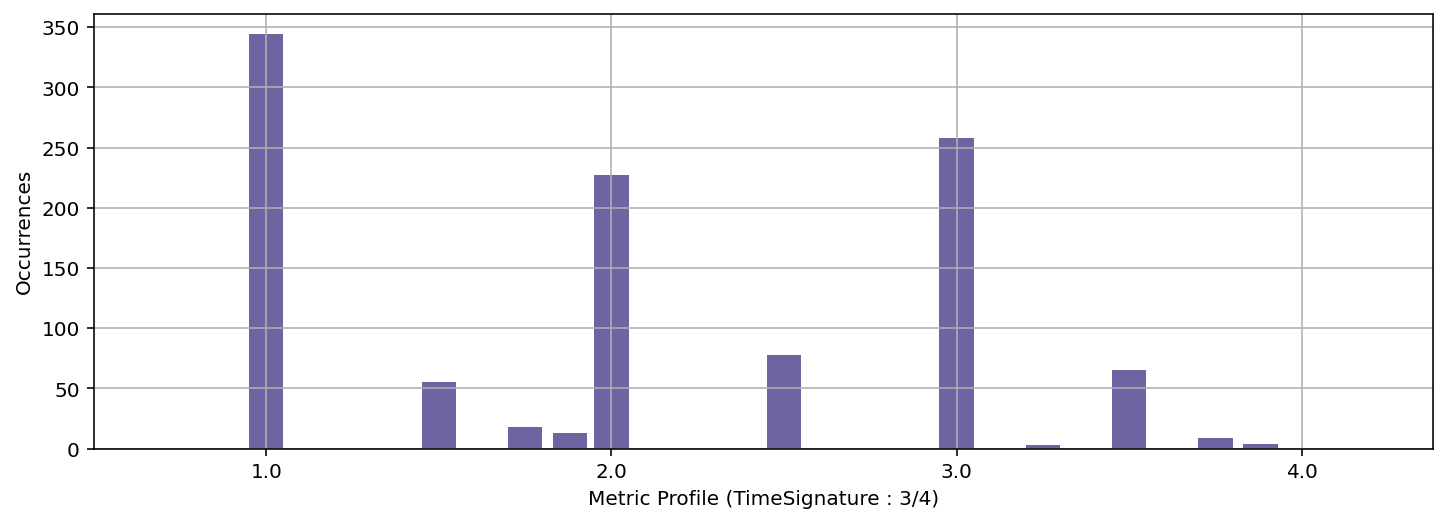

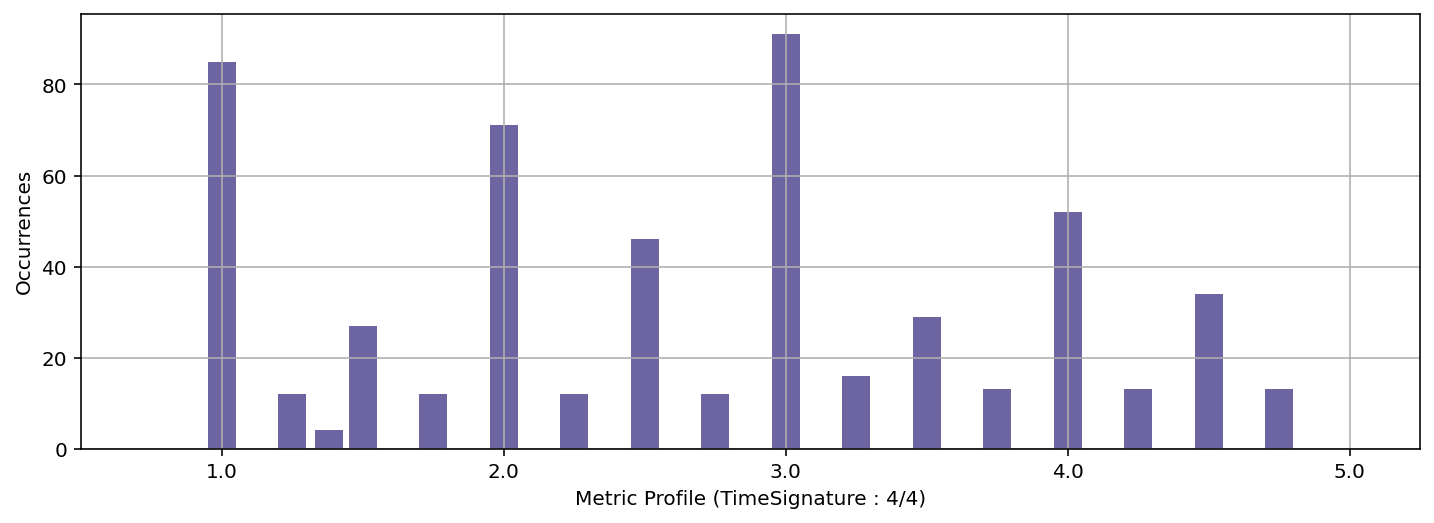

In [28]:
mp_ts_dict_2d = mp.analyse.metric_profile_split_time_signature(m_df, 
                                                            do_plot=True)

In [29]:
# The command for the table display (do_print=True)
# and the csv export (do_save=True) looks a bit complicated, 
# but does the same as always:

for k2 in mp_ts_dict_2d.keys():
    print(f"Time Signature {k2}")
    saveas = 'metric_profile_ts_'+k2.replace('/','-')+'.csv'

    mp.utils.export_as_csv(data=mp_ts_dict_2d[k2], 
                       columns=['Metric Profile','Occurrences'],
                       save_file_name ='metric_profile_hist.csv', 
                       do_save=False,
                       do_print=True, 
                       do_return_pd=False,
                       sep=';', 
                       index=False, 
                       header=True)

Time Signature 3/4


Time Signature 4/4


### 3. Two-dimensional frequency distributions<a id='3'></a>

We have already looked at the frequencies of pitches and pitch classes. Now we could say: Longer tones naturally have more weight than short tones or tones between beats. We can pursue this idea further by looking at combined, 'double' or 'bivariate' frequency distributions: for example, the frequencies of the pitches for different duration values, or the frequencies of the pitch class for the different metrical positions. In the following, we will deal with this by means of two examples.

* Example 1: Durations per pitch classes. Are there differences in the duration values for different pitch classes?

* Example 2: Pitch on metric positions. Are there differences in different positions in the measure regarding different pitch classes?       


### 3.1 Permanent values of the pitch classes<a id='31'></a>

The following command creates a so-called 3D graphic, where the frequencies of duration values per pitch class are displayed. Both the height and the color of the columns stand for the respective frequency (from blue=very rare via green and yellow to red=very frequent):

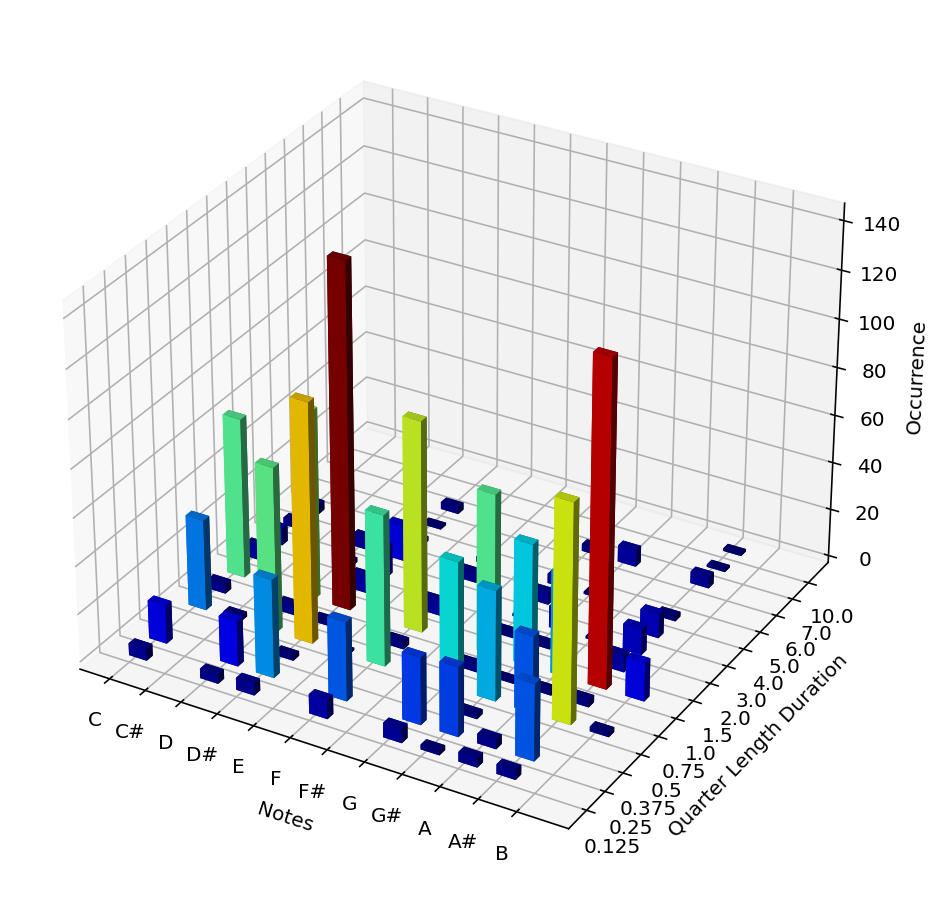

In [30]:
dur_hist = mp.analyse.quarterlength_duration_histogram(m_df,
                                                       plot_with='PitchClass',
                                                       do_plot=True)

Since the assignment of the bars to the note values is a bit confusing (the numbers refer to the subsequent fields), we use the following command to display the corresponding frequency table:

In [29]:
dur_hist = mp.analyse.quarterlength_duration_histogram(m_df,
                                                       plot_with='PitchClass',
                                                       do_plot=False)

mp.utils.export_as_csv(data=dur_hist,
                           columns=['Pitch Class', 'Duration Value', 'Occurences'],
                           save_file_name='QuaterLength.csv',
                           do_save=False,   # With =True a csv-file is saved. 
                           do_print=True,   # With =True al table is depicted.
                           do_return_pd=False,
                           sep=';',
                           index=False,
                           header=True)


It is not very surprising that the root E-flat (=D#) and the fifth B (=A#) occur mainly as eighth notes (0.5) and quarter notes (1.0). After all, these are the most frequent duration values!


The plot can be changed from pitch classes to pitches by selecting 'Pitch' (in single quotes) at the parameter plot_with=. Now, however, the 3D graphic becomes a bit more confusing...


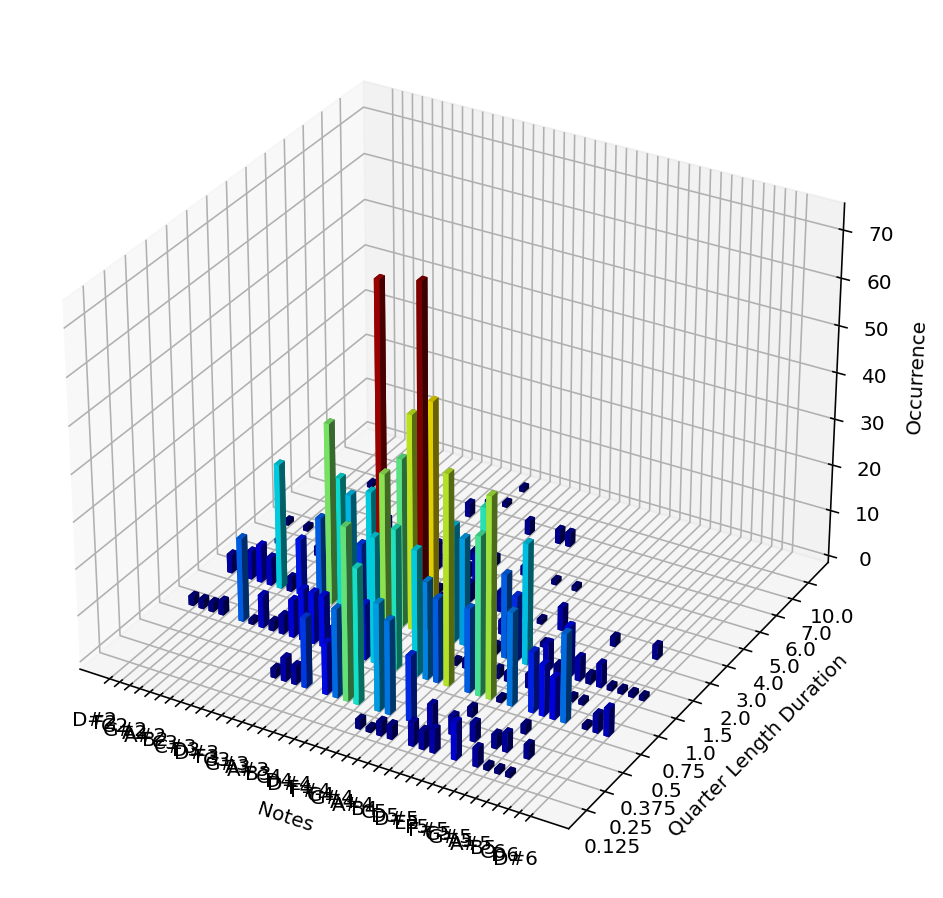

In [30]:
dur_pitch_hist = mp.analyse.quarterlength_duration_histogram(m_df,
                                                          plot_with='Pitch',
                                                          do_plot=True)

In [33]:
# Commands for tables and export (see above) 
# For column names (colums=  ) 'PitchClass' () has to be changed into 'Pitch'. 

dur_pitch_hist = mp.analyse.quarterlength_duration_histogram(m_df,
                                                          plot_with='Pitch',
                                                          do_plot=False)

mp.utils.export_as_csv(data=dur_pitch_hist,
                           columns=['Pitch','Duration Value', 'Occurences'],
                           save_file_name='QuaterLength.csv',
                           do_save=False,
                           do_print=True,
                           do_return_pd=False,
                           sep=';',
                           index=False,
                           header=True)

In [34]:
# In the external display, the graphic can be rotated and enlarged.
# Please delete the # in front of the command:

# %matplotlib


dur_p_hist = mp.analyse.quarterlength_duration_histogram(m_df,
                                                          plot_with='Pitch',
                                                          do_plot=True)

Using matplotlib backend: Qt5Agg


In [35]:
# To switch off the external display, please, choose the following command: 

%matplotlib inline

### 3.2 Metric positions of the pitch classes<a id='32'></a>

Now to the question: on which positions in the bar occur the twelve pitch classes? The following command will generate the corresponding 3D graphic.

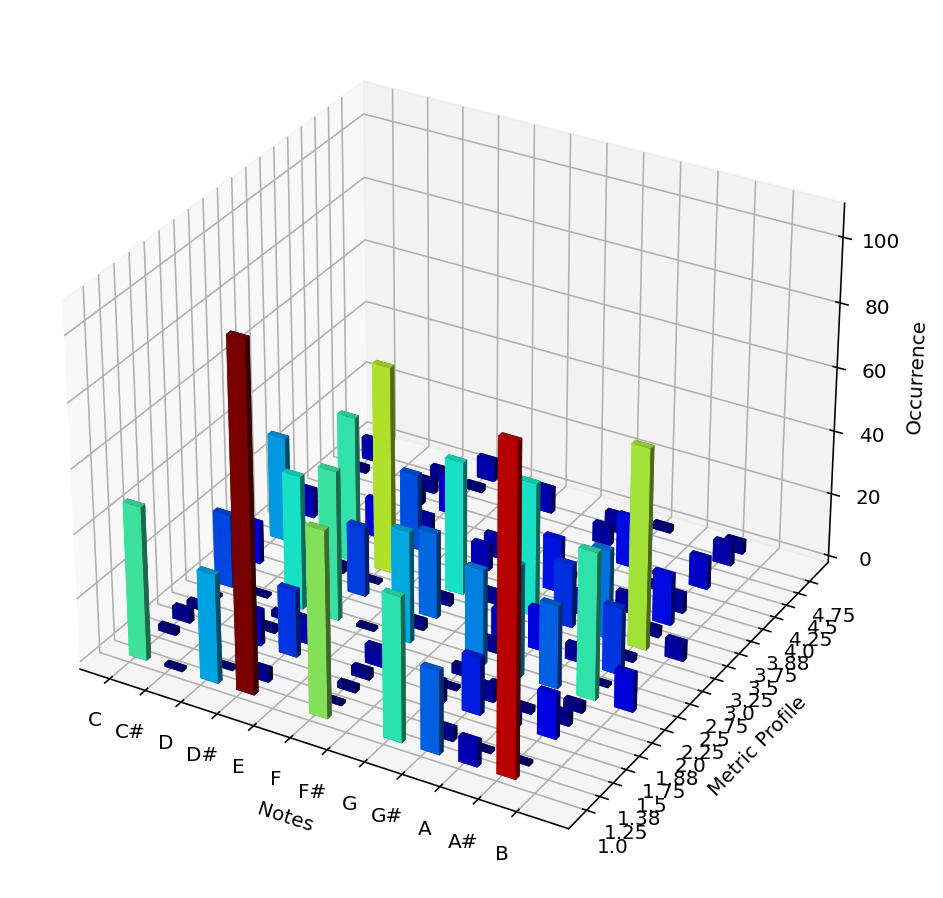

In [36]:
mp_p_hist = mp.analyse.metric_profile(m_df, 
                                      plot_with='PitchClass', 
                                      do_plot=True)

In [35]:
# Here is the corresponding table with the usual export function.       

mp_p_hist = mp.analyse.metric_profile(m_df, 
                                      plot_with='PitchClass', 
                                      do_plot=False)

mp.utils.export_as_csv(data=mp_p_hist, 
                       columns=['Pitch Class', 'Metric Position', 'Occurences'],
                       save_file_name ='metric_profile_hist.csv', 
                       do_save=True,
                       do_print=True, 
                       do_return_pd=False,
                       sep=';', 
                       index=False, 
                       header=True)

The same works with pitches. For this we simply have to replace 'PitchClass' with 'Pitch' in the ‘plot_with’ parameter:

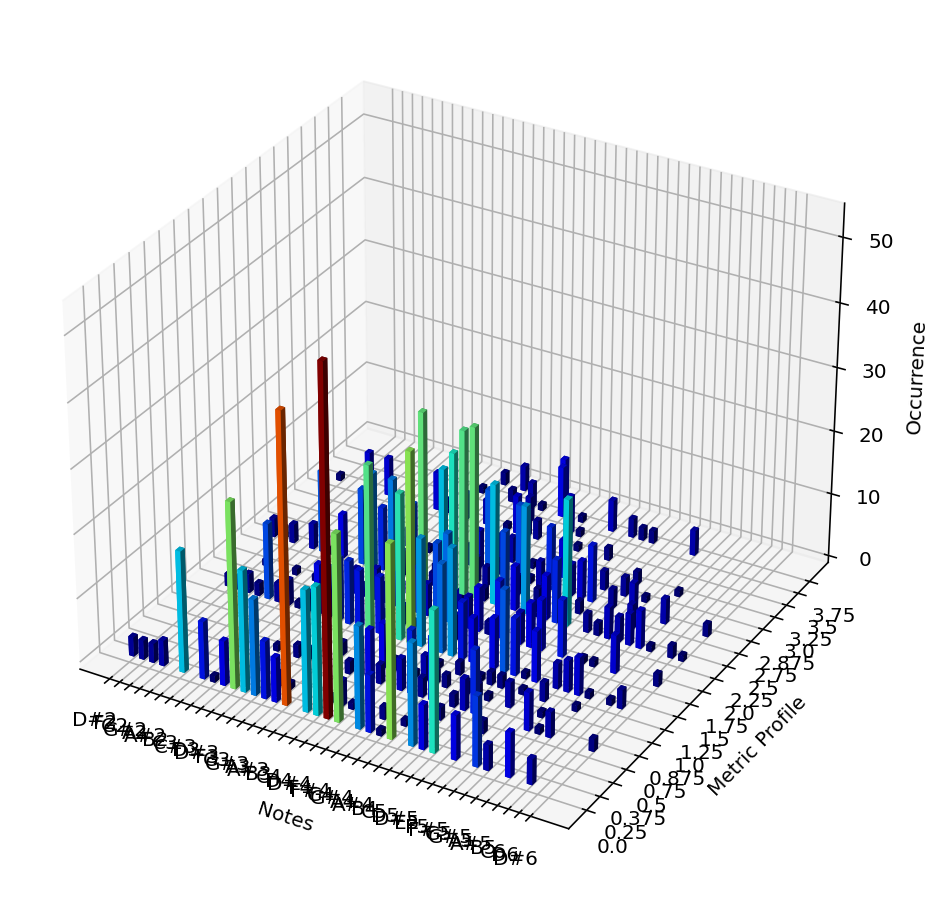

In [36]:
mp_pc_hist = mp.analyse.metric_profile(m_df, 
                                       plot_with='Pitch', 
                                       do_plot=True)

In [37]:
# table (do_print=True) and csv export (do_save=True): 

mp_pc_hist = mp.analyse.metric_profile(m_df, 
                                       plot_with='Pitch', 
                                       do_plot=None)

# There are now four columns in the table output, 
# therefore four labels has to be selected:
 

mp.utils.export_as_csv(data=mp_pc_hist, 
                       columns=['MIDI-Pitch','Pitch','Metric Position','Occurences'],
                       save_file_name ='metric_profile_hist.csv', 
                       do_save=False,
                       do_print=False, 
                       do_return_pd=False,
                       sep=';', 
                       index=False, 
                       header=True)

Again, it may be useful to look at the graph in Matplotlib's external pop-up window.

In [38]:
# %matplotlib 
# mp_pc_hist = mp.analyse.metric_profile(m_df, plot_with='PitchClass', do_plot=True)

In [ ]:
%matplotlib inline

However, we have now made a mistake: the Mozart movement does have a change of time signatures!!! However, we did not distinguish between 4/4 time and 3/4 time in our evaluation. Therefore, we have to repeat all commands again after we have differentiated into the two time signature types.

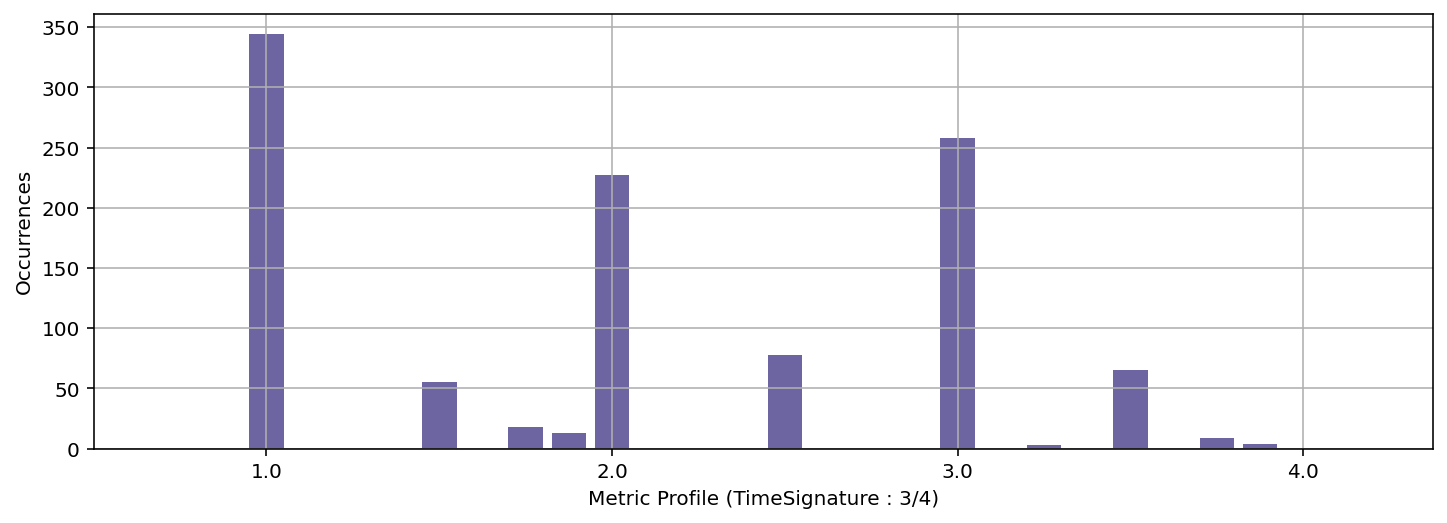

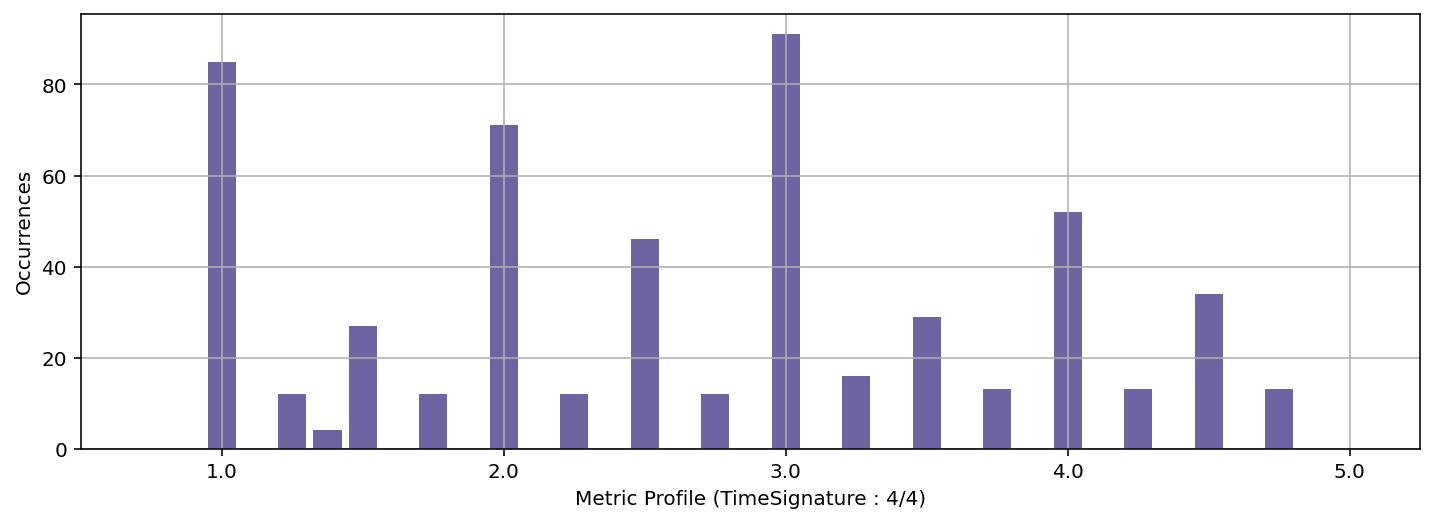

In [39]:
# Here again the command for the distinction of two different meters:
# In direct connection the pitch-duration profiles are displayed separately:  

mp_ts_dict_2d = mp.analyse.metric_profile_split_time_signature(m_df, 
                                                               plot_with=None, 
                                                               do_plot=True)




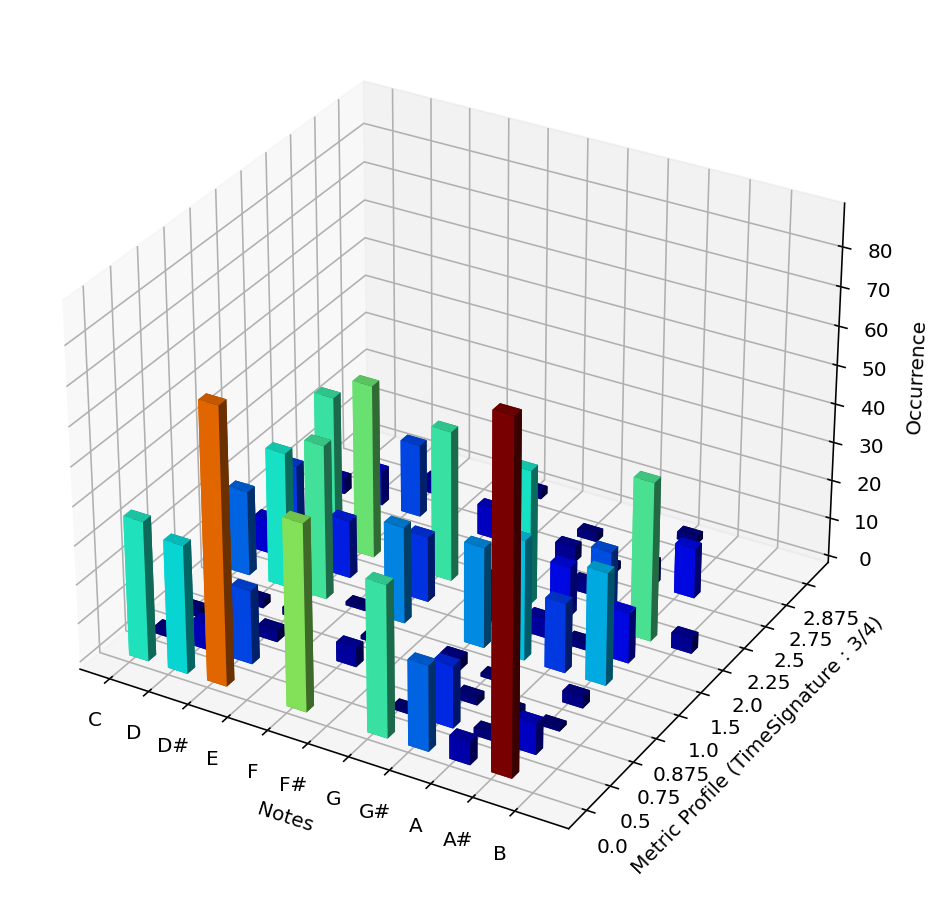

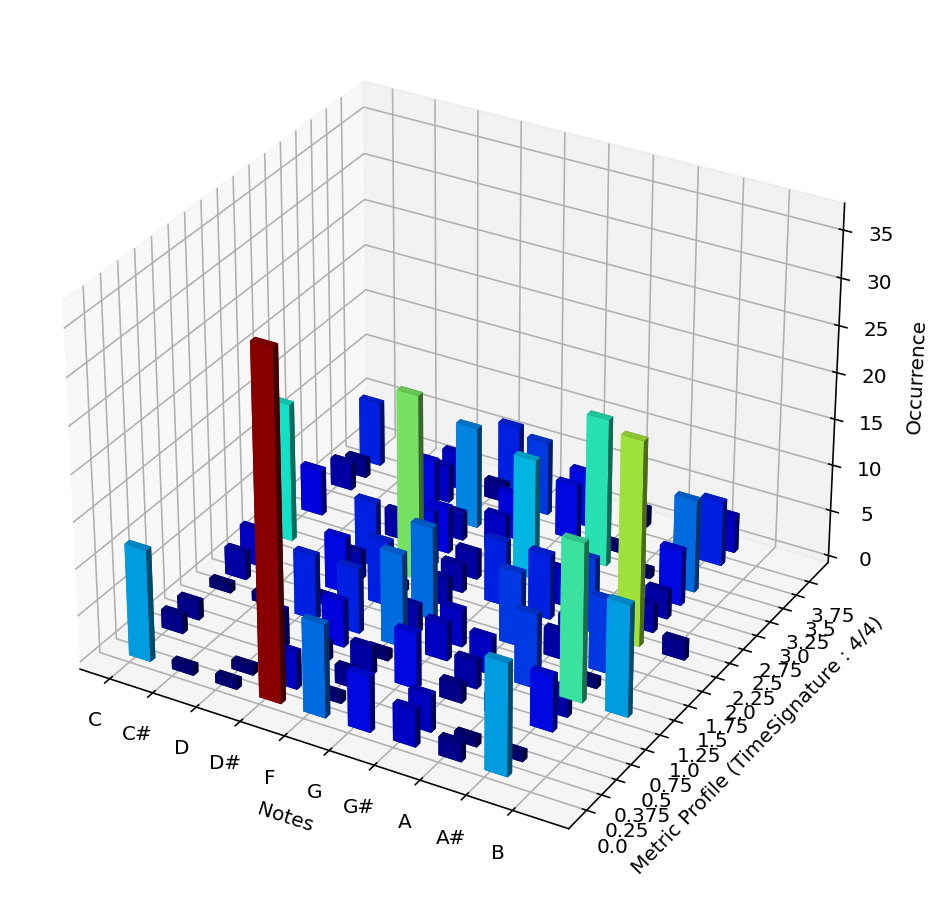

Time Signature 3/4
Time Signature 4/4


In [40]:
# Here is the command for displaying 
# he 3D graphics (do_plot=True)
# the table (do_print=True)
# and the csv export (do_save=True):  

mp_ts_dict_p = mp.analyse.metric_profile_split_time_signature(m_df, 
                                                              plot_with='PitchClass', 
                                                              do_plot=True)
for k2p in mp_ts_dict_p.keys():
    print(f"Time Signature {k2p}")
    saveas = 'metric_profile_ts_p_'+k2p.replace('/','-')+'.csv'

    mp.utils.export_as_csv(data=mp_ts_dict_p[k2p], 
                       columns=['MIDI', 'Metric Profile','Occurrences'],
                       save_file_name ='metric_profile_hist.csv', 
                       do_save=False,
                       do_print=False, 
                       do_return_pd=False,
                       sep=';', 
                       index=False, 
                       header=True)

# Here is the command for displaying he 3D graphics (do_plot=True)  

### 4. Application of bar and voice filters<a id='4'></a>

All statistical queries can be executed on any sections and voices with the help of an easy-to-use filter function (cf. Tutorial Part 1, Section 5). All you have to do is to enter the corresponding measures and voice names.

Here are two examples:


1. With the following commands a combined list of the interval frequencies of the two violin parts ('PartID':'1-2') for the first five measures ('Measure':'1-5') can be displayed, exported or shown as histogram.

This selection can be changed at will!

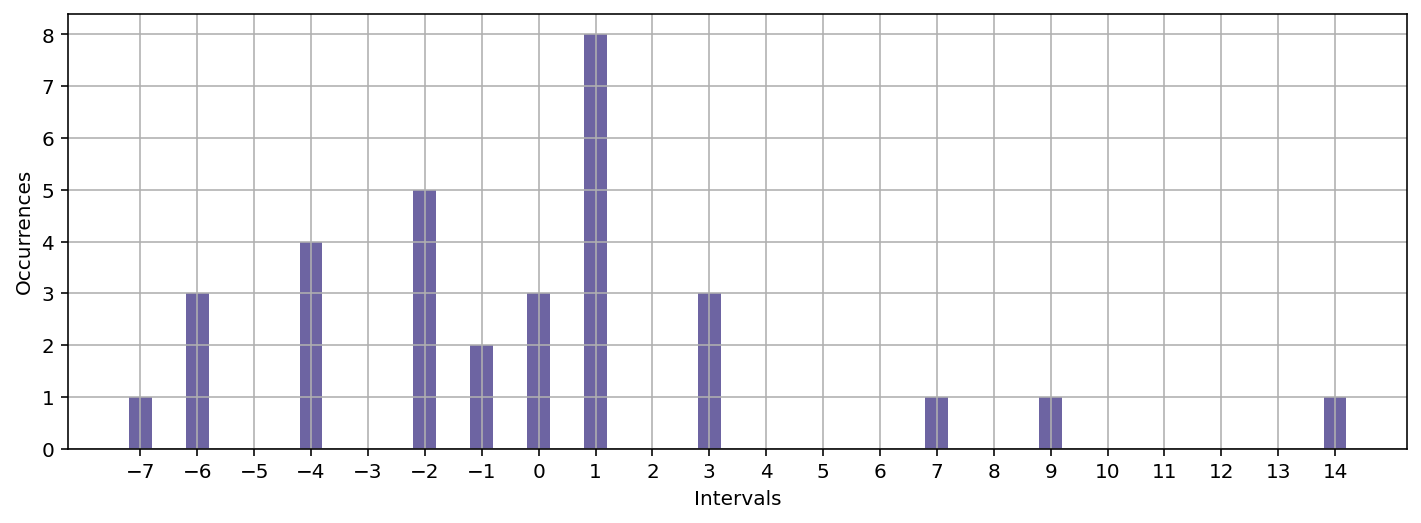

In [41]:
filter_dict_interval ={'PartID':'1-2', 'Measure':'1-5'}
interval_hist_example = mp.analyse.interval(m_df,
                                    do_plot=True, 
                                    filter_dict = filter_dict_interval)

mp.utils.export_as_csv(data=interval_hist_example, 
                       columns=['Interval', 'Occurrences'],
                       save_file_name ='interval.csv', 
                       do_save=False,
                       do_print=False, 
                       do_return_pd=False,
                       sep=';', 
                       index=False, 
                       header=True)

2. With the following commands a list of the pitch classes of the cello part ('PartID':'4') for the first ten bars ('Measure':'1-10') can be displayed, exported or shown as histogram.

This selection can also be changed as desired!

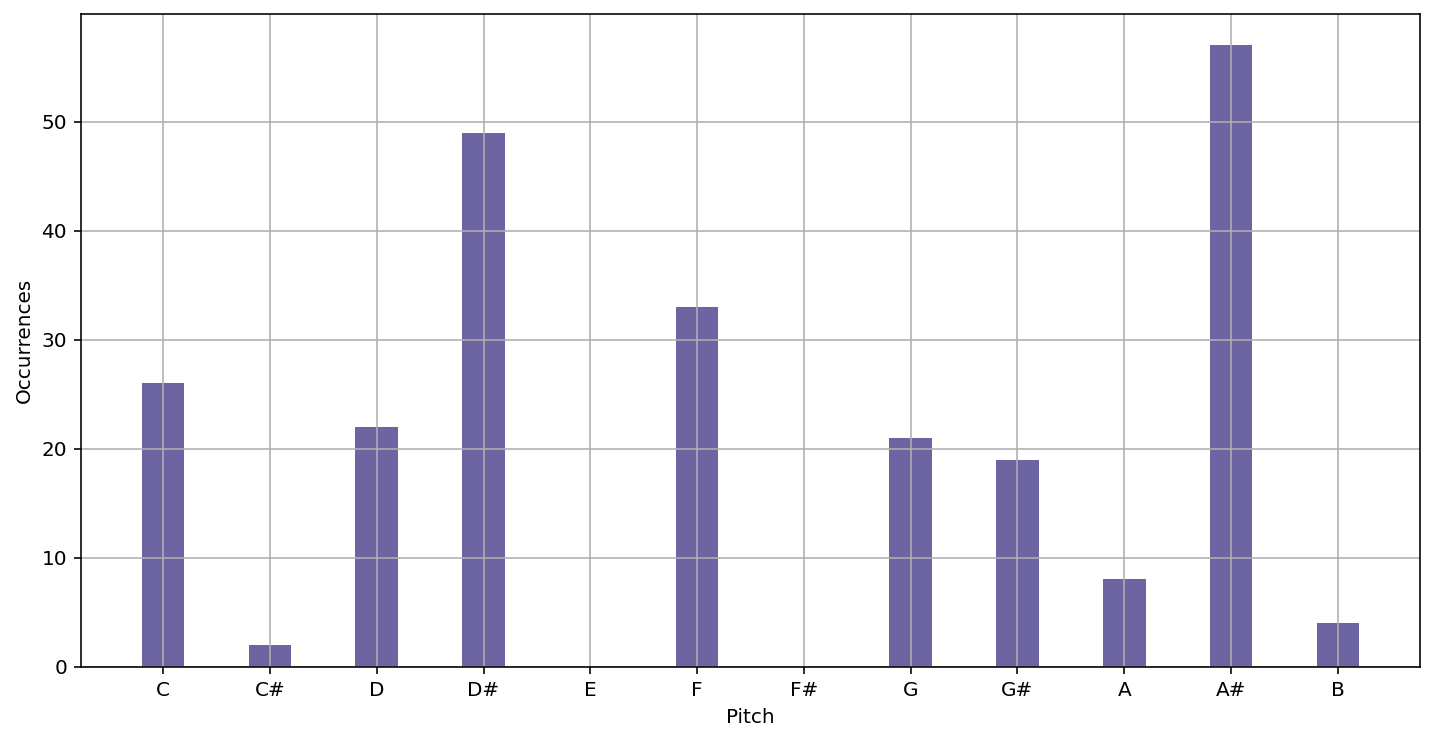

In [42]:
#filter_dict_cello ={'PartID':'4', 'Measure':'1-10'}

filter_dict_cello ={'PartID':'4'}

pitchclass_hist_cello = mp.analyse.pitch_class_histogram(m_df, 
                                                         do_plot=True,
                                                         filter_dict = filter_dict_cello)
mp.utils.export_as_csv(data=pitchclass_hist_cello, 
                       columns=['Pitch Class', 'Occurrences'],
                       save_file_name ='cello.csv', 
                       do_save=False,
                       do_print=True, 
                       do_return_pd=False,
                       sep=';', 
                       index=False, 
                       header=True)

### 5. Tasks<a id='5'></a>

So far, we have only looked at the results on the basis of a single piece. But how does the situation look now if we compare several pieces, e.g. several or all movements of a composition, with each other - and with other pieces? Are there stylistic regularities - or do the differences predominate?

Load compositions of your choice (different genres, composers, and eras) and compare these pieces with each other in terms of frequencies of pitches, pitch classes, note values, and intervals. Interpret the results in each case with a look at the sheet music!
